# Problem Statement

## Glass Identification Dataset
Problem Statement:
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



The chemical compositions are measured as the weight percent in corresponding oxide.

Attribute Information-

 Id number: 1 to 214
 RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass: (class attribute)
1- building_windows_float_processed
2- building_windows_non_float_processed
3- vehicle_windows_float_processed
4- vehicle_windows_non_float_processed (none in this database)
5- containers
6- tableware
7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


Predict : Type of glass

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv
https://github.com/dsrscientist/dataset3

# Importing dependencies

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [150]:
# Loading data
data=pd.read_csv('glass.csv')
data.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [151]:
data.shape

(214, 11)

##### We have 124 rows and 11 columns

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


##### All the data is of numerical and is of float and int data type.

In [153]:
# Checking for null values
data.isnull().any().sum()

0

#### We have no null values in our data

In [155]:
# Checking for duplicates
data.duplicated().sum()

0

### Data Cleaning

In [6]:
# Droping ID column as it doesn't required for predicting
data.drop(['ID'], axis=1, inplace=True)
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
data.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [9]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [10]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

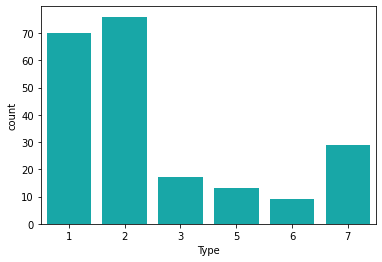

In [11]:
# ploting coutplot for target columns
sns.countplot(data['Type'],color='c')

In [12]:
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [13]:
# Checking the correlation of target with other columns
data.corr()['Type'].sort_values()

Mg     -0.744993
Fe     -0.188278
RI     -0.164237
K      -0.010054
Ca      0.000952
Si      0.151565
Na      0.502898
Ba      0.575161
Al      0.598829
Type    1.000000
Name: Type, dtype: float64

<AxesSubplot:>

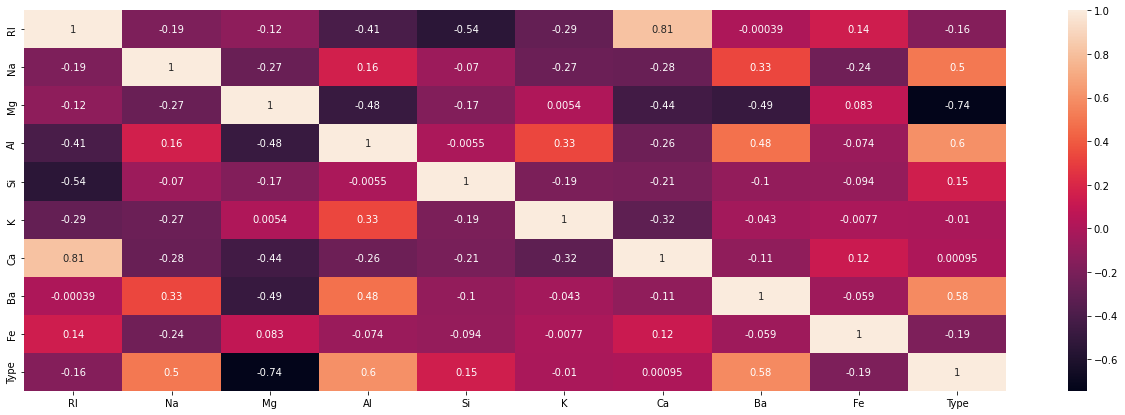

In [14]:
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(), annot=True)

# Data Visualisation

In [15]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


<AxesSubplot:xlabel='Type', ylabel='count'>

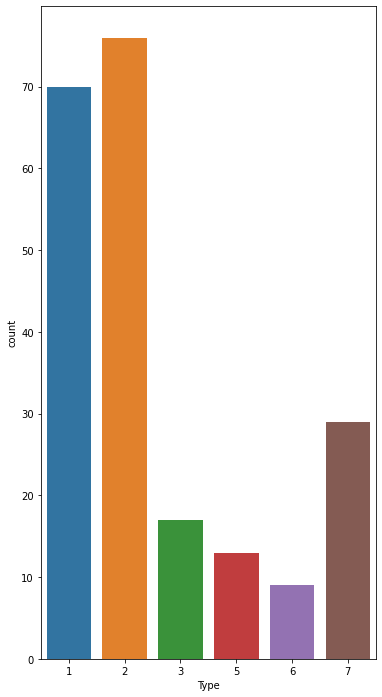

In [16]:
plt.figure(figsize=(6,12))
sns.countplot(data['Type'])

#### Most glasses are of type 2 folloewd by type 1 glass. Type 6 glasses are least in the dataset.

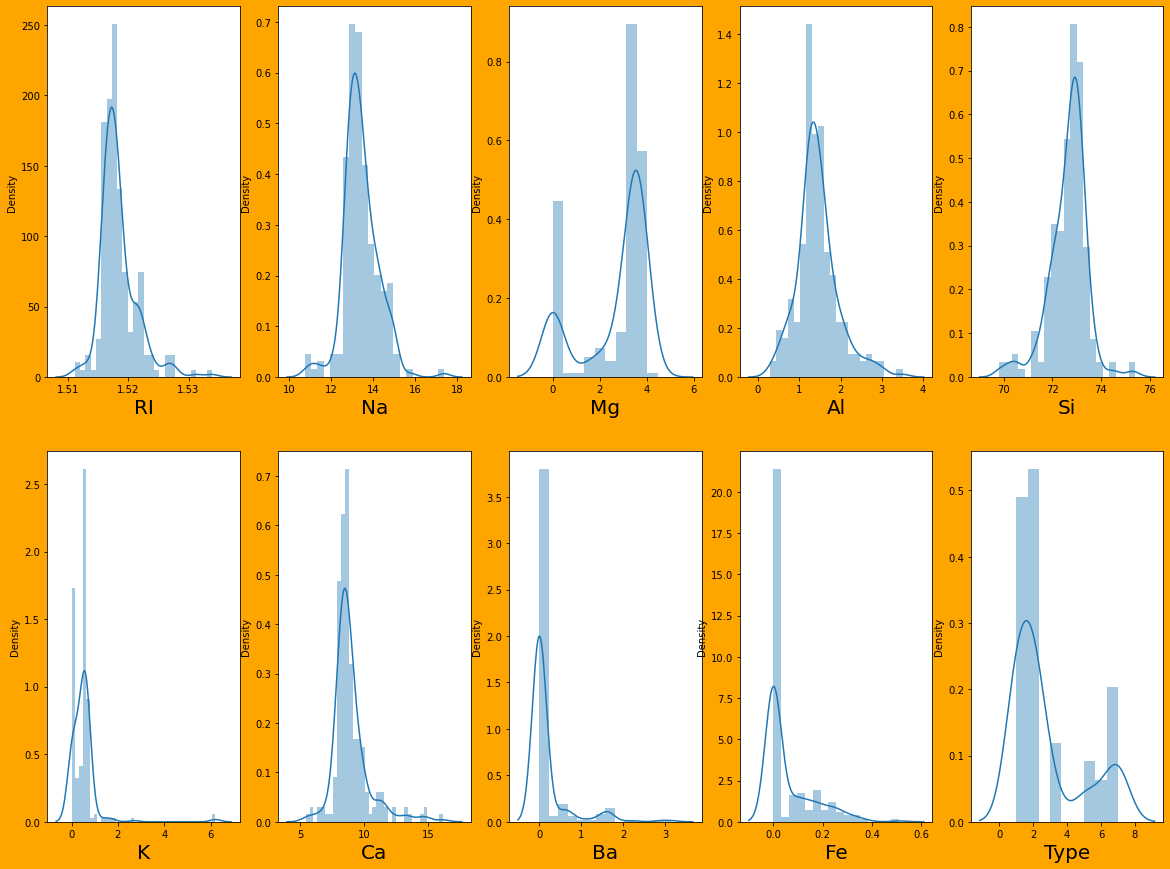

In [17]:
#Lets plot distribution plot
plt.figure(figsize=(20,15),facecolor='orange')
plotnumber = 1
for col in data :
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotnumber +=1
plt.show()

## Finding
Majority data for 'RI' lies arround 1.52 and is right skewed.
Majority data for 'NA' lies between 12-16 and is slightly right skewed.
Majority data for 'Mg' is between 3-4 and is left skewed.
Majority data for 'AI' is between 1-42 and is slightly right skewed.
Majority data for 'SI' is between 72-74 and is left skewed.
Majority data for 'K' is between 0-1 and is right skewed.
Majority data for 'Ca' is between 8-10 and is right skewed.
Majority data for 'Ba' at 0 and is right skewed.
Majority data for 'Fe' at 0 and is right skewed.


# Encoding

In [18]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [19]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

### We have only 1 categorical data(target) which is already in encoded form.

# Data Preprocessing

###### Deviding data into feature(x) and target (y)

In [20]:
x=data.drop('Type', axis=1)
Y=data['Type']

###### Outliers

<AxesSubplot:>

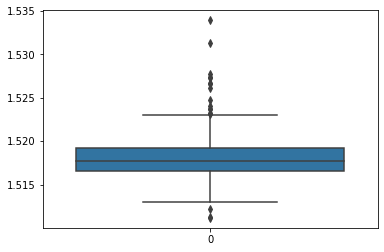

In [21]:
sns.boxplot(data=data['RI'])

<AxesSubplot:>

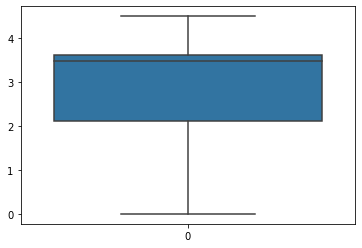

In [22]:
sns.boxplot(data=data['Mg'])

<AxesSubplot:>

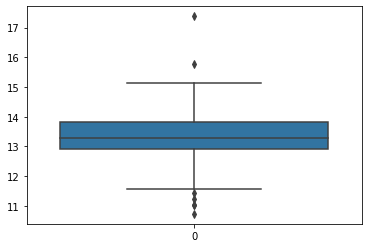

In [23]:
sns.boxplot(data=data['Na'])

<AxesSubplot:>

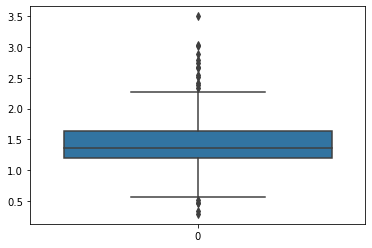

In [24]:
sns.boxplot(data=data['Al'])

<AxesSubplot:>

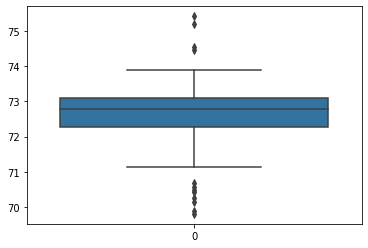

In [25]:
sns.boxplot(data=data['Si'])

<AxesSubplot:>

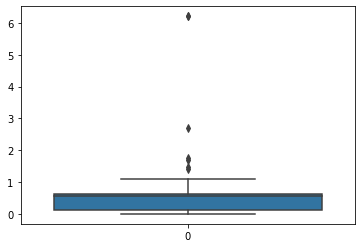

In [26]:
sns.boxplot(data=data['K'])

<AxesSubplot:>

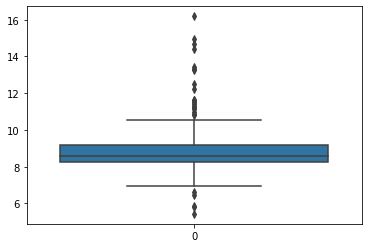

In [27]:
sns.boxplot(data=data['Ca'])

<AxesSubplot:>

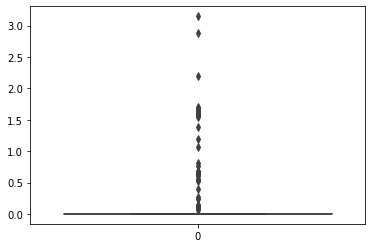

In [28]:
sns.boxplot(data=data['Ba'])

<AxesSubplot:>

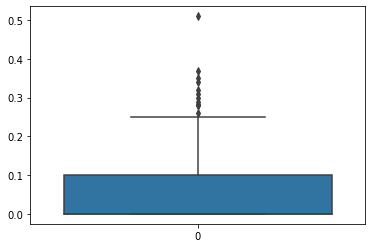

In [29]:
sns.boxplot(data=data['Fe'])

#### we can see we have outlier in almost every column, hence we have to remove them.

#### Removing Outlier 

In [30]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape

(214, 9)

In [31]:
np.where(z>3)

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
        131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
        188, 189, 201, 201, 203, 207, 213], dtype=int64),
 array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
        5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))

In [32]:
nd=data[(z<=3).all(axis=1)]
print(data.shape,'\n',nd.shape)


(214, 10) 
 (194, 10)


## Data loss

In [33]:
(214-194)/214*100

9.345794392523365

###### 10% data loss is acceptable. Hence we will consider data after outlier removel.

### New feature and target

In [34]:
nx=nd.drop('Type',axis=1)
ny=nd['Type']

### Data Distribution

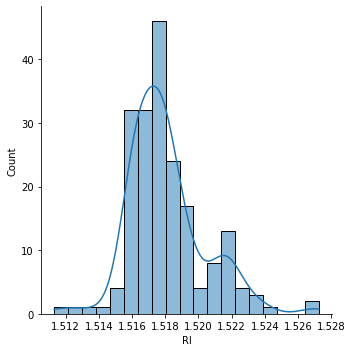

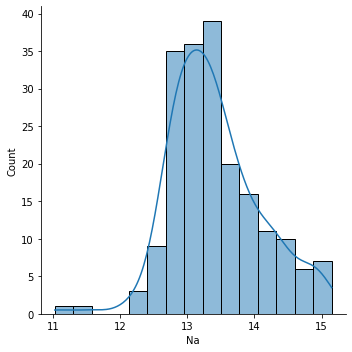

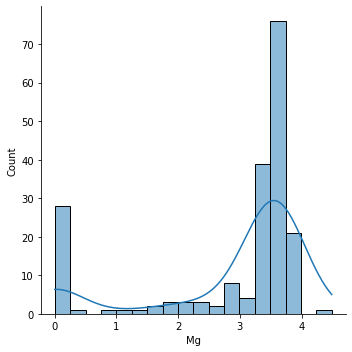

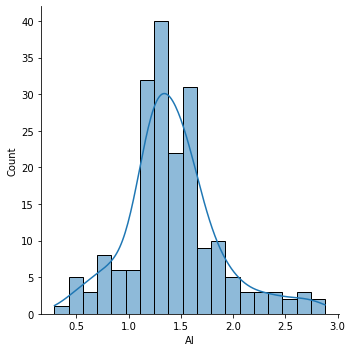

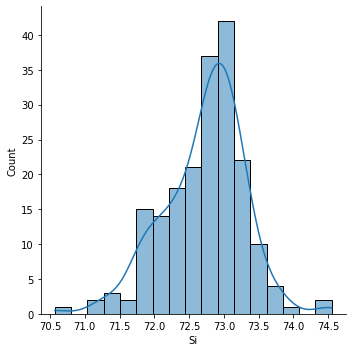

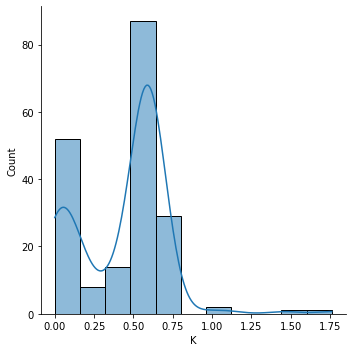

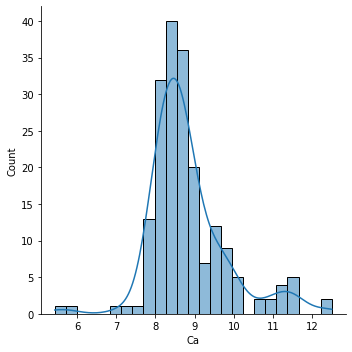

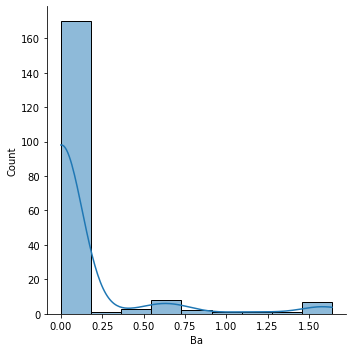

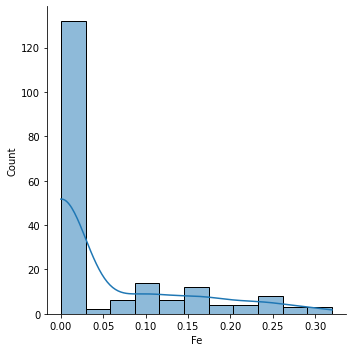

In [35]:
# Checking for the skewness
for i in nx:
    sns.displot(nx[i], kde=True)

###  We can see our data is skewed.

In [36]:
nx.skew()

RI    0.952733
Na    0.371482
Mg   -1.528849
Al    0.658259
Si   -0.425450
K     0.303175
Ca    1.077962
Ba    3.188587
Fe    1.486479
dtype: float64

In [37]:
nd.corr()['Type']

RI     -0.167355
Na      0.533025
Mg     -0.810321
Al      0.660262
Si      0.262152
K      -0.383499
Ca      0.154762
Ba      0.682768
Fe     -0.202028
Type    1.000000
Name: Type, dtype: float64

#### All the columns are highly correlated with target column. Hence we will not remove skewness as it will have some impact on our model.

## Resampling

In [38]:
nd['Type'].value_counts(normalize=True)*100

1    36.082474
2    35.051546
7    11.855670
3     8.247423
5     4.639175
6     4.123711
Name: Type, dtype: float64

### There is data inbalanced and data is small. Hence we will use oversapling.

#### Handling Data inbalance

In [39]:
#oversampling
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(nx,ny)

In [40]:
y.value_counts()

1    70
2    70
3    70
5    70
6    70
7    70
Name: Type, dtype: int64

<AxesSubplot:ylabel='count'>

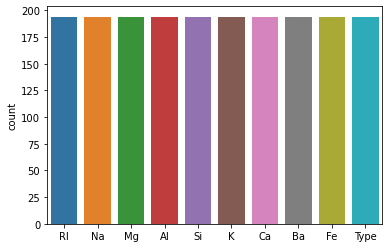

In [41]:
sns.countplot(data=nd)

## Scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()

xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.608532,0.633495,1.000000,0.312741,0.304020,0.034091,0.469590,0.0,0.0
1,0.395232,0.694175,0.801782,0.413127,0.542714,0.272727,0.339463,0.0,0.0
2,0.305521,0.606796,0.790646,0.482625,0.608040,0.221591,0.332390,0.0,0.0
3,0.398369,0.529126,0.821826,0.386100,0.512563,0.323864,0.394625,0.0,0.0
4,0.383312,0.543689,0.806236,0.366795,0.630653,0.312500,0.373409,0.0,0.0


# ML Model Training

In [69]:
# Getting the best random stae value
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test) 
    if (accuracy_score(y_train,pred_train)*100>88 and accuracy_score(y_test,pred_test)*100>88):
                      print("At random state", i ,"the training accuracy is", accuracy_score(y_train,pred_train))
                      print("At random state", i ,"the test accuracy is", accuracy_score(y_test,pred_test))
                      print("\n")

At random state 19 the training accuracy is 0.8839285714285714
At random state 19 the test accuracy is 0.8809523809523809


At random state 61 the training accuracy is 0.8928571428571429
At random state 61 the test accuracy is 0.8809523809523809


At random state 89 the training accuracy is 0.8898809523809523
At random state 89 the test accuracy is 0.9166666666666666




#### At randm state 19 we are receiving best accuracy of the model. Hence we will use random state=19 for our model.

## KNeighborsClassifier

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=19)
                                               
knn.fit(x_train,y_train)

pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)

print('Accuracy\n',accuracy_score(y_test,pred_test),'\n', accuracy_score(y_train,pred_train))
print('Confusion matrix\n',confusion_matrix(y_test,pred_test))
print('classification Report\n',classification_report(y_test,pred_test))

Accuracy
 0.8809523809523809 
 0.8839285714285714
Confusion matrix
 [[12  2  3  0  0  0]
 [ 3  7  2  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 10]]
classification Report
               precision    recall  f1-score   support

           1       0.80      0.71      0.75        17
           2       0.78      0.58      0.67        12
           3       0.77      1.00      0.87        17
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00        10

    accuracy                           0.88        84
   macro avg       0.89      0.88      0.88        84
weighted avg       0.88      0.88      0.88        84



In [83]:
# Finding the best value of fold
for j in range(2,16):
    cv_score=cross_val_score(knn,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"AT cross fold {j} the cv score is {cv_mean}")
    print('\n')

AT cross fold 2 the cv score is 0.769047619047619


AT cross fold 3 the cv score is 0.8047619047619047


AT cross fold 4 the cv score is 0.819047619047619


AT cross fold 5 the cv score is 0.8119047619047619


AT cross fold 6 the cv score is 0.8142857142857144


AT cross fold 7 the cv score is 0.8119047619047618


AT cross fold 8 the cv score is 0.8165820029027576


AT cross fold 9 the cv score is 0.8259841710350498


AT cross fold 10 the cv score is 0.8166666666666667


AT cross fold 11 the cv score is 0.8237026131762974


AT cross fold 12 the cv score is 0.8261904761904763


AT cross fold 13 the cv score is 0.8285984848484849


AT cross fold 14 the cv score is 0.830952380952381


AT cross fold 15 the cv score is 0.8285714285714286




### At j=18 we are getting cross value score nearest to our accuracy score.

In [84]:
# cross validation for KNN model
cv_score=cross_val_score(knn,x,y,cv=14)
cv_mean=cv_score.mean()
print(f"cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test)-cv_mean)

cv score is 0.830952380952381
Difference between accuracy and validation score 0.04999999999999993


## DecisionTreeClassifier

In [85]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier()
d_tree.fit(x_train,y_train)

pred_test_tree=d_tree.predict(x_test)

print('Accuracy\n',accuracy_score(y_test,pred_test_tree))
print('Confusion matrix\n',confusion_matrix(y_test,pred_test_tree))
print('classification Report\n',classification_report(y_test,pred_test_tree))


Accuracy
 0.8571428571428571
Confusion matrix
 [[13  3  0  0  0  1]
 [ 2  8  2  0  0  0]
 [ 3  1 13  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 10]]
classification Report
               precision    recall  f1-score   support

           1       0.72      0.76      0.74        17
           2       0.67      0.67      0.67        12
           3       0.87      0.76      0.81        17
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        12
           7       0.91      1.00      0.95        10

    accuracy                           0.86        84
   macro avg       0.86      0.87      0.86        84
weighted avg       0.86      0.86      0.86        84



In [86]:
# cross validation for DecisionTreeClassifier
cv_score=cross_val_score(d_tree,x,y,cv=14)
cv_mean=cv_score.mean()
print(f"cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_tree)-cv_mean)

cv score is 0.8428571428571431
Difference between accuracy and validation score 0.014285714285714013


In [87]:
# Ensemble technique
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, ExtraTreesClassifier

## RandomForestClassifier

In [88]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

pred_test_rfc=rfc.predict(x_test)

print('Accuracy\n',accuracy_score(y_test,pred_test_rfc))
print('Confusion matrix\n',confusion_matrix(y_test,pred_test_rfc))
print('classification Report\n',classification_report(y_test,pred_test_rfc))

Accuracy
 0.9166666666666666
Confusion matrix
 [[12  3  1  0  0  1]
 [ 1 10  1  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 10]]
classification Report
               precision    recall  f1-score   support

           1       0.92      0.71      0.80        17
           2       0.77      0.83      0.80        12
           3       0.89      1.00      0.94        17
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        12
           7       0.91      1.00      0.95        10

    accuracy                           0.92        84
   macro avg       0.92      0.92      0.92        84
weighted avg       0.92      0.92      0.91        84



In [89]:
# cross validation for RandomForestClassifier
cv_score=cross_val_score(rfc,x,y,cv=14)
cv_mean=cv_score.mean()
print(f"cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_rfc)-cv_mean)

cv score is 0.892857142857143
Difference between accuracy and validation score 0.023809523809523614


## GradientBoostingClassifier

In [90]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

pred_test_gbc=gbc.predict(x_test)

print('Accuracy\n',accuracy_score(y_test,pred_test_gbc))
print('Confusion matrix\n',confusion_matrix(y_test,pred_test_gbc))
print('classification Report\n',classification_report(y_test,pred_test_gbc))

Accuracy
 0.9285714285714286
Confusion matrix
 [[13  2  0  1  0  1]
 [ 0 11  1  0  0  0]
 [ 1  0 16  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 10]]
classification Report
               precision    recall  f1-score   support

           1       0.93      0.76      0.84        17
           2       0.85      0.92      0.88        12
           3       0.94      0.94      0.94        17
           5       0.94      1.00      0.97        16
           6       1.00      1.00      1.00        12
           7       0.91      1.00      0.95        10

    accuracy                           0.93        84
   macro avg       0.93      0.94      0.93        84
weighted avg       0.93      0.93      0.93        84



In [91]:
# cross validation for GradientBoostingClassifier
cv_score=cross_val_score(gbc,x,y,cv=14)
cv_mean=cv_score.mean()
print(f"cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_gbc)-cv_mean)

cv score is 0.8857142857142858
Difference between accuracy and validation score 0.042857142857142816


## ExtraTreesClassifier

In [92]:
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)


pred_test_etc=etc.predict(x_test)

print('Accuracy\n',accuracy_score(y_test,pred_test_etc))
print('Confusion matrix\n',confusion_matrix(y_test,pred_test_etc))
print('classification Report\n',classification_report(y_test,pred_test_etc))

Accuracy
 0.9285714285714286
Confusion matrix
 [[13  2  1  0  0  1]
 [ 0 11  1  0  0  0]
 [ 1  0 16  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 10]]
classification Report
               precision    recall  f1-score   support

           1       0.93      0.76      0.84        17
           2       0.85      0.92      0.88        12
           3       0.89      0.94      0.91        17
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        12
           7       0.91      1.00      0.95        10

    accuracy                           0.93        84
   macro avg       0.93      0.94      0.93        84
weighted avg       0.93      0.93      0.93        84



In [93]:
# cross validation for ExtraTreesClassifier
cv_score=cross_val_score(etc,x,y,cv=14)
cv_mean=cv_score.mean()
print(f"cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_etc)-cv_mean)

cv score is 0.8928571428571429
Difference between accuracy and validation score 0.0357142857142857


# Tuning

In [106]:
from sklearn.model_selection import GridSearchCV

parameters={
    
    "max_depth":[3,5,8],
    "max_features":["auto", "sqrt", "log2"],
    "criterion":["gini", "entropy"],
    "n_estimators":[50,100,150]
    }

In [107]:
clf=GridSearchCV(ExtraTreesClassifier(),parameters)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 150}


In [108]:
Tuned_model=ExtraTreesClassifier(n_estimators= 150, max_features='auto', max_depth= 8, criterion= 'entropy')
Tuned_model.fit(x_train, y_train)

pred_test_tuned=Tuned_model.predict(x_test)

print('Accuracy\n',accuracy_score(y_test,pred_test_tuned))
print('Confusion matrix\n',confusion_matrix(y_test,pred_test_tuned))
print('classification Report\n',classification_report(y_test,pred_test_tuned))

Accuracy
 0.9166666666666666
Confusion matrix
 [[12  3  1  0  0  1]
 [ 1 10  1  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 10]]
classification Report
               precision    recall  f1-score   support

           1       0.92      0.71      0.80        17
           2       0.77      0.83      0.80        12
           3       0.89      1.00      0.94        17
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        12
           7       0.91      1.00      0.95        10

    accuracy                           0.92        84
   macro avg       0.92      0.92      0.92        84
weighted avg       0.92      0.92      0.91        84



In [109]:
# cross validation for Tuned_model
cv_score=cross_val_score(Tuned_model,x,y,cv=14)
cv_mean=cv_score.mean()
print(f"cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_tuned)-cv_mean)

cv score is 0.8785714285714287
Difference between accuracy and validation score 0.03809523809523796


### Tuning of DecisionTreeClassifier

In [110]:
parameters={
    
    "max_depth":[3,5,8],
    "max_features":["auto", "sqrt", "log2"],
    "criterion":["gini", "entropy"]
    
    }

In [111]:
clf=GridSearchCV(DecisionTreeClassifier(),parameters)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}


In [112]:
Tuned_dtree=DecisionTreeClassifier(max_features='auto', max_depth= 8, criterion= 'gini')
Tuned_dtree.fit(x_train, y_train)

pred_test_tuned=Tuned_dtree.predict(x_test)

print('Accuracy\n',accuracy_score(y_test,pred_test_tuned))
print('Confusion matrix\n',confusion_matrix(y_test,pred_test_tuned))
print('classification Report\n',classification_report(y_test,pred_test_tuned))

Accuracy
 0.8333333333333334
Confusion matrix
 [[11  4  2  0  0  0]
 [ 0  9  2  0  0  1]
 [ 3  1 12  0  0  1]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 10]]
classification Report
               precision    recall  f1-score   support

           1       0.79      0.65      0.71        17
           2       0.64      0.75      0.69        12
           3       0.75      0.71      0.73        17
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        12
           7       0.83      1.00      0.91        10

    accuracy                           0.83        84
   macro avg       0.84      0.85      0.84        84
weighted avg       0.84      0.83      0.83        84



In [113]:
# cross validation for Tuned_dtree
cv_score=cross_val_score(Tuned_dtree,x,y,cv=14)
cv_mean=cv_score.mean()
print(f"cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_tuned)-cv_mean)

cv score is 0.8333333333333336
Difference between accuracy and validation score -2.220446049250313e-16


## Tuning of RandomForestClassifier

In [116]:
parameters={
    
    "max_depth":[3,5,8],
    "max_features":["auto", "sqrt", "log2"],
    "criterion":["gini", "entropy"],
    "n_estimators":[50,100,150]
    }

In [117]:
clf=GridSearchCV(RandomForestClassifier(),parameters)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 50}


In [118]:
Tuned_rfc=RandomForestClassifier(n_estimators=50, max_features='log2', max_depth= 8, criterion= 'gini')
Tuned_rfc.fit(x_train, y_train)

pred_test_tuned=Tuned_rfc.predict(x_test)

print('Accuracy\n',accuracy_score(y_test,pred_test_tuned))
print('Confusion matrix\n',confusion_matrix(y_test,pred_test_tuned))
print('classification Report\n',classification_report(y_test,pred_test_tuned))

Accuracy
 0.9166666666666666
Confusion matrix
 [[12  3  1  0  0  1]
 [ 1 10  1  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 10]]
classification Report
               precision    recall  f1-score   support

           1       0.92      0.71      0.80        17
           2       0.77      0.83      0.80        12
           3       0.89      1.00      0.94        17
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        12
           7       0.91      1.00      0.95        10

    accuracy                           0.92        84
   macro avg       0.92      0.92      0.92        84
weighted avg       0.92      0.92      0.91        84



In [119]:
# cross validation for Tuned_dtree
cv_score=cross_val_score(Tuned_rfc,x,y,cv=14)
cv_mean=cv_score.mean()
print(f"cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_tuned)-cv_mean)

cv score is 0.8857142857142859
Difference between accuracy and validation score 0.03095238095238073


# Saving the model

Since Tuned_dtree is providing the best result(minimum difference between accuracy and validation score). So we will save the Tuned_dtree model.

In [122]:
import pickle
filename='glass.pkl'
pickle.dump(Tuned_dtree, open(filename,'wb'))

# Conclusion

In [124]:
loaded_model=pickle.load(open('glass.pkl','rb'))


original=np.array(y_test)
predicted=np.array(loaded_model.predict(x_test))

In [144]:
accuracy_score(y_test,loaded_model.predict(x_test))

0.8333333333333334

In [146]:
df=pd.DataFrame({'Original':original,'Predicted':predicted})
df

,Original,Predicted
0,7,7
1,3,2
2,6,6
3,7,7
4,5,5
...,...,...
79,7,7
80,1,2
81,2,7
82,1,1


# Predictive System

1. building_windows_float_processed
2- building_windows_non_float_processed
3- vehicle_windows_float_processed
4- vehicle_windows_non_float_processed (none in this database)
5- containers
6- tableware
7- headlamps

In [129]:
input_data=(1.51556,13.87,0,2.54,73.23,0.14,9.41,0.81,0.01)
ar_data=np.asarray(input_data)
reshaped=ar_data.reshape(1,-1)
pred=loaded_model.predict(reshaped)

if pred[0]==1:
    print('building_windows_float_processed')
    
elif pred[0]==2:
    print('building_windows_non_float_processed')   
elif pred[0]==3:
    print('vehicle_windows_float_processed')      
elif pred[0]==4:
    print('vehicle_windows_non_float_processed')
    
elif pred[0]==5:
    print('containers')      
    
elif pred[0]==6:
    print('tableware')      
    
elif pred[0]==7:
    print('headlamps')  
    
else:
    print('Not defined') 
    
    

headlamps


In [143]:
input_data=(1.5164,12.55,3.48,1.87,73.23,0.63,8.08,0,0.09)
ar_data=np.asarray(input_data)
reshaped=ar_data.reshape(1,-1)
pred=loaded_model.predict(reshaped)

if pred[0]==1:
    print('building_windows_float_processed')
    
elif pred[0]==2:
    print('building_windows_non_float_processed')   
elif pred[0]==3:
    print('vehicle_windows_float_processed')      
elif pred[0]==4:
    print('vehicle_windows_non_float_processed')
    
elif pred[0]==5:
    print('containers')      
    
elif pred[0]==6:
    print('tableware')      
    
elif pred[0]==7:
    print('headlamps')  
    
else:
    print('Not defined') 
    

headlamps


In [137]:
input_data=(1.52369,13.44,0,1.58,72.22,0.32,12.24,0,0)
ar_data=np.asarray(input_data)
reshaped=ar_data.reshape(1,-1)
pred=loaded_model.predict(reshaped)

if pred[0]==1:
    print('building_windows_float_processed')
    
elif pred[0]==2:
    print('building_windows_non_float_processed')   
elif pred[0]==3:
    print('vehicle_windows_float_processed')      
elif pred[0]==4:
    print('vehicle_windows_non_float_processed')
    
elif pred[0]==5:
    print('containers')      
    
elif pred[0]==6:
    print('tableware')      
    
elif pred[0]==7:
    print('headlamps')  
    
else:
    print('Not defined') 

containers
